<a href="https://colab.research.google.com/github/Sourav-Manik/Python_for_Data_Science/blob/main/P_127_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sweetviz
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 11.1 MB/s 


In [ ]:
df = pd.read_csv("/content/energy_production.csv",sep=';')
df.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


#EDA

In [ ]:
#Data Structure 
type(df)

pandas.core.frame.DataFrame

In [ ]:
#data types
df.dtypes

temperature          float64
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
#Count of duplicated rows
df[df.duplicated()].shape

(41, 5)

In [ ]:
#Print the duplicated rows
df[df.duplicated()]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


In [ ]:
df_cleaned1=df.drop_duplicates()

In [ ]:
df_cleaned1.shape

(9527, 5)

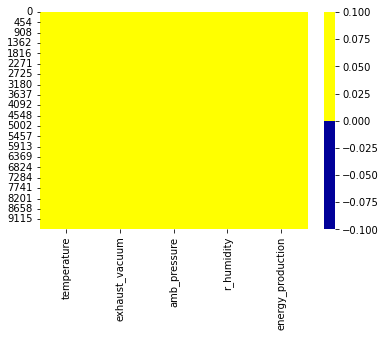

In [ ]:
#Missing Values and Imputation

import seaborn as sns
cols = df_cleaned1.columns 
colours = ['#000099', '#ffff00'] # specify the colours - Yellow is missing. Blue is not missing.
sns.heatmap(df_cleaned1[cols].isnull(),
            cmap=sns.color_palette(colours))

In [ ]:
df_cleaned1.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,54.293421,1013.237084,73.334951,454.33591
std,7.444397,12.686309,5.940526,14.607513,17.03908
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.530000,41.740000,1009.085000,63.375000,439.75000
50%,20.350000,52.080000,1012.920000,75.000000,451.52000
75%,25.710000,66.510000,1017.200000,84.850000,468.36500
max,37.110000,81.560000,1033.300000,100.160000,495.76000


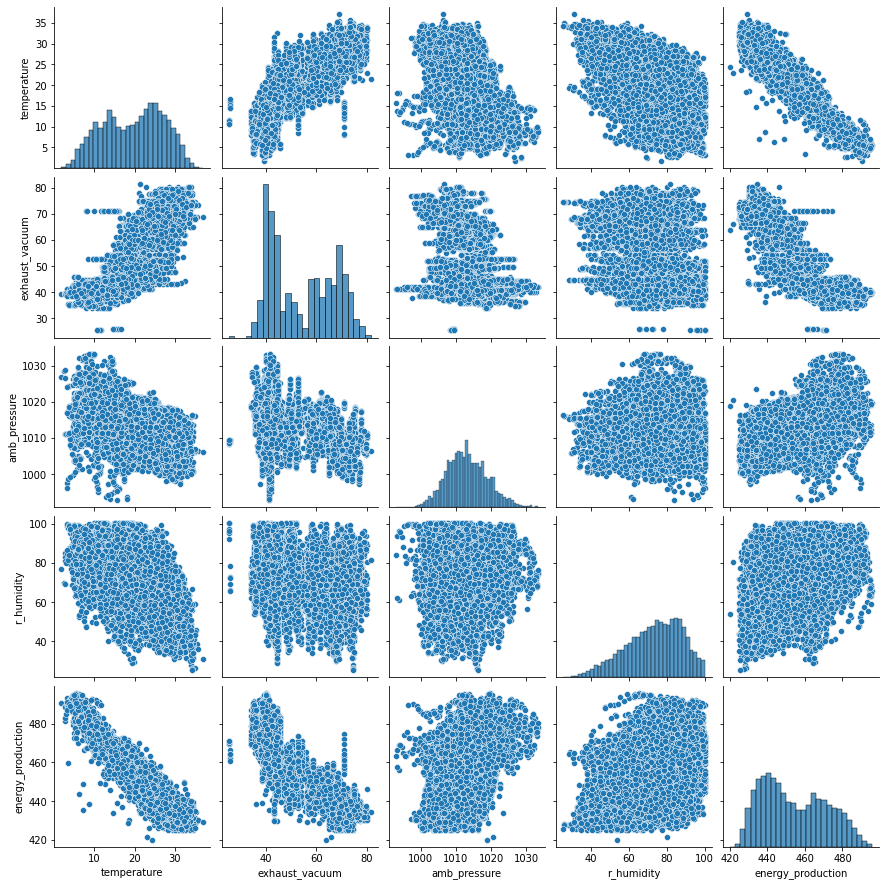

In [ ]:
#Scatter plot and Correlation analysis
sns.pairplot(df_cleaned1)

In [ ]:
#Correlation
df_cleaned1.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.843689,-0.508222,-0.543947,-0.947908
exhaust_vacuum,0.843689,1.000000,-0.415718,-0.312214,-0.869900
amb_pressure,-0.508222,-0.415718,1.000000,0.101631,0.518687
r_humidity,-0.543947,-0.312214,0.101631,1.000000,0.391175
energy_production,-0.947908,-0.869900,0.518687,0.391175,1.000000


In [ ]:
#Normalization of the data

In [ ]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_cleaned1.values

array([[   9.59,   38.56, 1017.01,   60.1 ,  481.3 ],
       [  12.04,   42.34, 1019.72,   94.67,  465.36],
       [  13.87,   45.08, 1024.42,   81.69,  465.48],
       ...,
       [  30.44,   56.24, 1005.19,   56.24,  429.34],
       [  23.  ,   66.05, 1020.61,   80.29,  421.57],
       [  17.75,   49.25, 1020.86,   63.67,  454.41]])

In [ ]:
array = df_cleaned1.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.22 0.23 0.6  0.46 0.81]
 [0.29 0.3  0.66 0.93 0.6 ]
 [0.34 0.35 0.78 0.75 0.6 ]
 [0.34 0.51 0.62 0.72 0.62]
 [0.38 0.43 0.76 0.66 0.57]]


#Auto EDA

In [ ]:
#analyzing the dataset
EDA_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
#display the report
EDA_report.show_html('energy_production.html')

Report energy_production.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
